# Final Project - Forecasting Intermittent Demand with Recurring Neural Networks (RNN)

## Description

The objective of this project is to assess the ability of an RNN to forecast sales based on historical data.  There  are many studies on how RNNs are well suited for forecasting sales.  However, this project will focus on demand profiles of products that exhibit sporatic demand patterns.  A brief discussion of sporatic demand is provided below. 

At a high level, product families to be forecast will be based on high revenue generating families and demand patterns.  The data set will consist of 45 months (Jan 2020 - Oct 2023) of demand history for the selected product lines.  The first three years will be used for training and testing and the last year used for model evaluation.  Given the propritary nature of the data some specifics of the data will be ommitted.

***Motivation / Problem OVerview***

The ability to accurately forecast future demand is critical to any business.  Forecasting future demand in mixed model businesses requires different forecasting models depending on the business model’s historical demand profiles. Using a single model across all business units or product lines can lead to excellent results in some areas and very poor results in others.  The ability to classify the various demand profiles allows for application of the most appropriate forecasting model and improved forecasting accuracy.

Additionally, demand inevitably changes over time, therefore identifying and understanding how demand is changing is critical to accurate forecasting.  The ability to identify profile changes and reclassify the demand patterns allows for a pivot to a more appropriate forecasting model based on current demand attributes.
Forecasts have impacts across the business.  Inventory levels, long and short-term capacity, strategic plans, headcount, and profit are all intimately linked to understanding future demand.

When future demand is overstated the business will be left with slow moving or obsolete inventory, excess capacity and human resources leading to negative impacts on profits and other financial performance metrics.
When future demand is understated the business will not be prepared from a materials, capacity or resource position to meet the actual demand.  The end result being additional costs in expediting material and unplanned overtime costs.  Again, eroding profits and negatively impacting financial performance.  Additionally, not meeting customer demand often leads to lost business as customers find alternate suppliers.

In the end, accurate forecasting is crucial. And critical to accurate forecasting is correct demand pattern classification so that the optimal forecasting model is deployed.


**Recurring Neural Networks**

Model Architecture - Long-Short Term Memory (LSTM)

The LSTM model is built around the recurring neural networks (RNN) architecture. RNNs are neural networks that are capable of analyzing sequential or time series data. The LSTM is based on a network of gates and feedback loops between nodes and layers. These gates and feedback loops result in the ability of the network to maintain information over time, where the time frames vary.

The ability to maintain both short- and long-term information allows the network to contextualize the information. The contextualization characteristic brings the network closer to analyzing information as a human would. This makes LSTM models especially adept at analyzing sequential data such a speech or text recognition.

We will use the LSTM model to analyze and categorize texts in this project. The goal of the LSTM is to properly characterize texts as disaster related or not. The LSTM model will use training and learned context within the texts to characterize each text.

The basic LSTM first initializes the text sequence through an encoder. The encoder transforms the character text strings in to linear arrays based on encoder parameters. The encoded sequences then pass through various LSTM layers and dense layers to generate a characterization of the text.

This project will compare two LTSM model architectures, based on accuracy, to see which architecture provides the better performance. The first model will be a basic LSTM model with and embedding(encoding) layer, a bi-directional LSTM layer, followed by a dense layer with ReLU activation. Then pass to a dense layer of one that feeds the characterization layer with sigmoid activation for characterization purposes.

The second model will bracket the LSTM layer with a spatial dropout and dropout layer. The purpose of the addition of the dropout layers is to assess the impact on potential overfitting in the base model.


## EDA / Data Summary

**Sporatic Demand**

Since the demand pattern detailed analysis is beyond the primary scope of the project aand was only used aas a selection tool for the forecasting data an abbreviated explanationof the the EDA and demand pattern analysis is provided.

Traditional forecasting models and evaluation metrics break down when past demand is not “smooth”.  Sporatic demand is when past demand is intermittent (many periods or consecutive periods with zero demand) or erratic (demand levels with large variability) traditional models break down.  They tend to bias towards the zero periods or demand level extremes.

In 1972, J. Croston developed a more suitable forecasting model to accommodate intermittent demand.  As part of the model development, Croston defined a new classification scheme for demand patterns.

The classification model is comprised of two attributes.  First is the Average Demand Interval (ADI), which is the average of demand over total periods with demand.  For example, given the 12-period sample demand profile in Table 1, ADI = 2.0 (12 Total Periods / 6 Periods with Demand).  This attribute provides the average demand interval in periods, when there is actual demand.

The second attribute, the Coefficient of Variance Squared (CV2) captures the variability in the level of demand.  This is the standard deviation (σ) of the demand divided by the mean (m) of the demand squared.  Again, the population is for the periods with actual demand.

Cronston identified four distinct demand patterns based on the ADI-CV2 pair.  The patterns are Erratic, Intermittent, Lumpy and Smooth.  See Image 1,provided by FREPPLE, for a grphical representation.  The four patterns are characterized as follows:

    •	Erratic – Regular Demand in Time with High Variability Demand Quantities

    •	Intermittent - Irregular Demand in Time with Low Variability Demand Quantities

    •	Lumpy - Irregular Demand in Time with High Variability Demand Quantities

    •	Smooth - Regular Demand in Time and Demand Quantities

***Image 1***

![demand%20pattern%20representation.png](attachment:demand%20pattern%20representation.png)


Reprinted from “Demand Classification: Why Forecastability Matters,” by FREPPLE). 2021 (https://frepple.com/blog/demand-classification/). Copyright 2021 by FREPPLE.


For simplicity and expediancy sake, the EDA and processsing of the demand pattern data was performed in Excell.  The intial data set consisted of 588 products whose demand history from 2017 to 2021 was analyzed.  The definitions for ADI and CV2 were applied via a simple spreadsheet.  Image 2 is a snapshot of the spreadsheet used to generate the demand profile distribution showed in image 3.  

***Image 2***
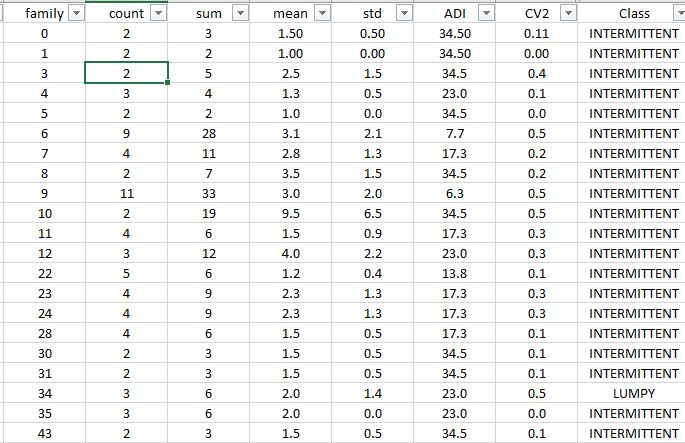

Image 3 defines the category mapping for theCronston demand pattern model.

***Image 3***
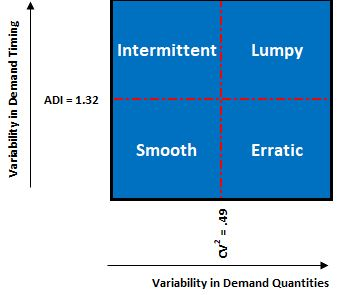

Image 4 shows the results of the demand pattern analysis.  Image 2 confirms that the demand patterns of the business unit (Business Unit 1) meets the criterial of of sporatic demand.  In summary, 86% of the products fell into the intermittent category and 102 into the lumpy catergory.

***Image 4***
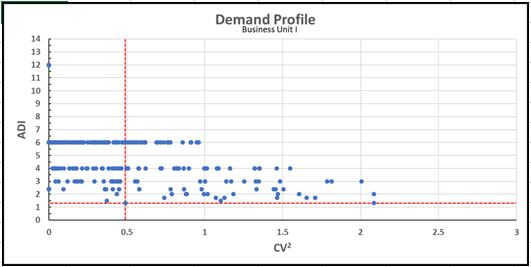

With the nature of the demand patterns identified and confirmed, selection of the specific product familes needs to be determined.  The determination of the specific products is based on the revenue generated for each of the product families.  It was determined that 49 families generated ~90% of the revenue.  The demand history of these 49 families will be used in the forecasting model.

In [1]:
#!pip


In [1]:
#Set Page Width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Load Required Resources

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
#from tensorflow.keras.preprocessing import text, sequence
#from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import models
from tensorflow.python.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Embedding
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Bidirectional
from keras.optimizers import Adam
from tensorflow.keras.layers import*

In [4]:
## Import Data
demand_df = pd.read_csv("demand.csv")
demand_pattern_df = pd.read_csv("demand_patterns.csv ")

print(demand_df.head(), '\n')
print(demand_df.info(), '\n')
print('Train Shape: ', demand_df.shape, '\n')
print(demand_pattern_df.head(), '\n')
print(demand_pattern_df.info())
print('Test Shape: ', demand_pattern_df.shape, '\n')

   family_id fabricated  hardware  business_unit_id  period  demand
0          1          Y         1                 1       1     355
1          1          Y         1                 1       2     205
2          1          Y         1                 1       3    1303
3          1          Y         1                 1       4     202
4          1          Y         1                 1       5     303 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_id         2205 non-null   int64 
 1   fabricated        2205 non-null   object
 2   hardware          2205 non-null   int64 
 3   business_unit_id  2205 non-null   int64 
 4   period            2205 non-null   int64 
 5   demand            2205 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 103.5+ KB
None 

Train Shape:  (2205, 6) 

   family_id  count    sum    m

### Model EDA

EDA will be performed as follows:

    1. Extract data and preprocess in Excell
    2. Remove Unnecessary Columns
    3. Check for Outliers
    3. Verify Family and Period Count
    4. Family Pattern Distribution
    5. Pattern Time Series Examples
    

***Extract and Preprocess***

The data was extracted directly from the Enterprise Resource System (ERP).  Due to the extraction method and format of the data Excell is the prefered tool for data cleanse and structuring given its eas of use.  The general steps for data cleanse and structuring are as follows.

    1. Remove Unused Business Unit Lines (3 BUs)
    2. Remove Service Lines (non-demand lines)
    3. Remove Unnecessary Columns (18)
    4. Remove Unused Product Family Lines (202 Families)
    5. Remove Non-Fabricated Product Lines
    6. Assign Product Family Ids
    7. Pivot to Monthly View to Add 0 Quantity Months. (populate time series with 0 quantity months)
    8. Convert to Tidy format

**Drop fabricated, hardware and business_unit_id**

**Drop count, sum, mean, std**

In [5]:
# Drop fabricated, hardware  and business_unit_id 

demand_df = demand_df.drop(['fabricated', 'hardware', 'business_unit_id'], axis=1)
demand_pattern_df = demand_pattern_df.drop(['count', 'sum', 'mean', 'std'], axis=1)

print(demand_df.head(), '\n')
print(demand_pattern_df.head())

   family_id  period  demand
0          1       1     355
1          1       2     205
2          1       3    1303
3          1       4     202
4          1       5     303 

   family_id   ADI   CV2    class
0          1  1.57  0.95    LUMPY
1          2  1.00  0.81  ERRATIC
2          3  1.53  1.17    LUMPY
3          4  1.05  1.59  ERRATIC
4          5  3.63  1.39    LUMPY


**NA Check**

In [6]:
#Check for NaNs and Nulls
print('Demand NaNs / Null Count: ', demand_df.isna().sum(), '\n')
print('Demand Patterns NaNs / Null Count: ', demand_pattern_df.isna().sum(), '\n')

Demand NaNs / Null Count:  family_id    0
period       0
demand       0
dtype: int64 

Demand Patterns NaNs / Null Count:  family_id    0
ADI          0
CV2          0
class        0
dtype: int64 



NA Check For data frames as expected.

***Check for Outliers***

In [7]:
demand_df.describe()

,family_id,period,demand
count,2205.000000,2205.000000,2205.000000
mean,25.000000,23.000000,62.194558
std,14.145344,12.990119,171.657773
min,1.000000,1.000000,-966.000000
25%,13.000000,12.000000,0.000000
50%,25.000000,23.000000,10.000000
75%,37.000000,34.000000,52.000000
max,49.000000,45.000000,4187.000000


Negative quantities have been identified in the demand column.

This is indicitive of returned product and should not be considered part of the demand.

Convert and negative demand values to 0.

In [8]:
demand_df[demand_df < 0] = 0
demand_df.describe()

,family_id,period,demand
count,2205.000000,2205.000000,2205.000000
mean,25.000000,23.000000,62.772336
std,14.145344,12.990119,170.186030
min,1.000000,1.000000,0.000000
25%,13.000000,12.000000,0.000000
50%,25.000000,23.000000,10.000000
75%,37.000000,34.000000,52.000000
max,49.000000,45.000000,4187.000000


Negative demand quantities have been removed

**Verify Family and Period Count**

In [9]:
print('Demand Unique Family ID Count: ', demand_df['family_id'].nunique(), '\n')
print('Demand Unique Period Count: ', demand_df['period'].nunique(), '\n')
print('Demand Pattern Unique Family ID Count: ', demand_pattern_df['family_id'].nunique(), '\n')
print('Demand Pattern Unique Class Count: ', demand_pattern_df['class'].nunique(), '\n')

Demand Unique Family ID Count:  49 

Demand Unique Period Count:  45 

Demand Pattern Unique Family ID Count:  49 

Demand Pattern Unique Class Count:  3 



Unique Value Check For data frames as expected.

***Family Pattern Distribution***

As can be seen in Chart 1, all of the families are classified with an intermittent pattern.  None of the familes being evaluted fall into the smooth pattern class.

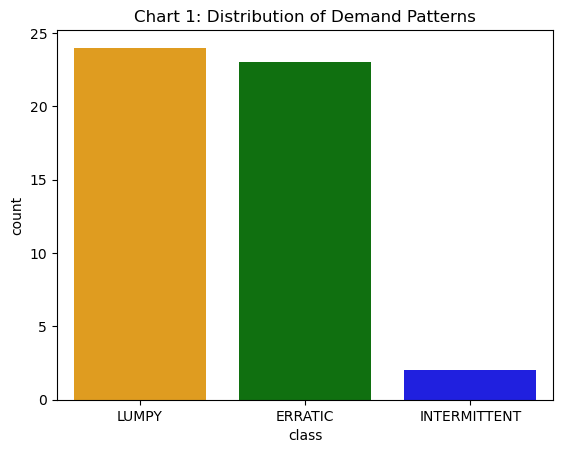

In [114]:
plt.figure()
sns.countplot(data=demand_pattern_df, x='class', palette=['orange',"#008000", 'blue'])
plt.title('Chart 1: Distribution of Demand Patterns')
plt.show()

**Sample Time Series Plots for Each Demand Pattern**


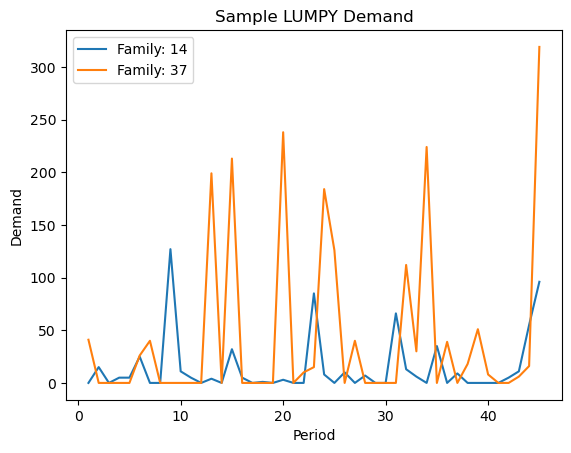

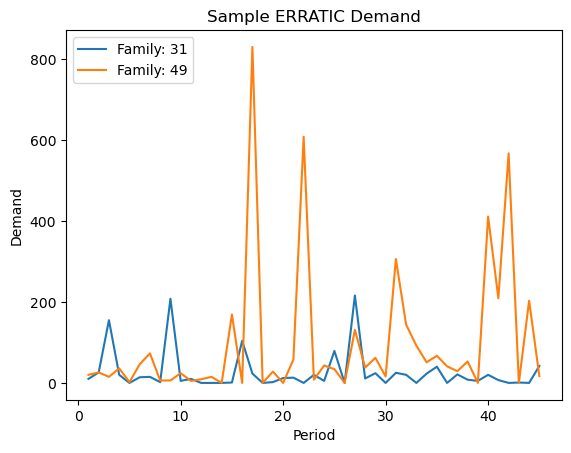

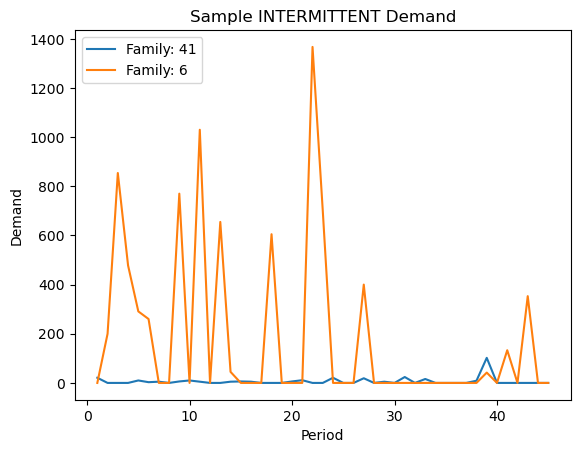

In [123]:
pattern = ['LUMPY', 'ERRATIC', 'INTERMITTENT']
sample_size = 2
chart_num = 1
for pat in pattern:
    
    lumpy_family_id = list(demand_pattern_df[demand_pattern_df['class'] == pat].sample(sample_size)['family_id'])
    for p in range(sample_size):
        lumpy_series1 = demand_df[demand_df['family_id'] == lumpy_family_id[p]]
        plt.plot(lumpy_series1['period'], lumpy_series1['demand'], label = 'Family: ' + str(lumpy_family_id[p]))
        plt.title ('Sample '+pat+' Demand')  

    
    plt.xlabel('Period')
    plt.ylabel('Demand')
    plt.legend(loc = 'upper left')

    plt.show()
  

The three charts above provide illustrations of the three resident demand patterns.  Review of the charts shows that the associated demand series align with the pattern descriptions.  The lumpy profiles exhibit highly varible demand levels and frequency.  The erratic profiles show fairly constant demand freuency with high variablility in quantity.  The intermittent profiles show relatively stable demand quanties with higly variable frequency.  

**EDA Summary**

Through the EDA and data cleansing process it has been established that the demand patterns of the product familes are indeed sporatic per the Cronston defitions.  It has also been verified that the product family time series data is complete with 45 periods containing demand in all periods, including zero demand.  Sample time series plots also confirm that the data is in the proper order for the analysis.

### Models

Model Architecture - Long-Short Term Memory (LSTM)

The LSTM model is built around the recurring neural networks (RNN) architecture.  RNNs are neural networks that are capable of analyzing sequential or time series data.  The LSTM is based on a network of gates and feedback loops between nodes and layers.  These gates and feedback loops result in the ability of the network to maintain information over time, where the time frames vary.

add timeseries explanation

This project will compare two LTSM model architectures, based on average root mean suare error (RMSE), to see which architecture provides the better performance.  The first model will be a basic LSTM model witha sindle LSTM layer, followed by a dense layer with ReLU activation.  This is the most simplistic model to be used as a baseline.
 
The second model will layer three sequential LSTM layers, followed by an intermediate Dense layer, and then the final Dense layer for output.  The thought process being building an environemnt where the most simle basic model can be compared to and much more complex model.  It is expected that the increased comlexity of the second model will provide the RNN with a greater ability to forecast the sporatic demand patterns.  FOr each of the 49 procus families, the models will be trained and then a forecast generated.  The RMSE between the forecast and actuals will be calculated and analyzed.  A comparison of the avergae RMSE across families will also be provided.  This will provide nsight into how we'll the models repond to the three differnt demand pattern classifications.

Various epoch counts were reviewed with 100 being the sweet spot for observing the model differences, while maintaining a reasonable run time.


In [51]:
#Model Builing and Training helper functions

def get_family_demand(fam_id):
    demand_profile_family_df = demand_df[demand_df['family_id'] == fam_id]
    demand_profile_df = demand_profile_family_df.drop(['family_id','period'], axis=1)
    demand_profile_nparray = demand_profile_df.values  #convert to numpy array
#     print('in family demand')
#     print(type(demand_profile_nparray))
#    print(demand_profile_nparray)
#     print(demand_profile_df)
#     print(demand_profile_family_df.head())
#     print(demand_profile_df.head())
#     print(demand_profile_df.describe())
    return demand_profile_nparray

#Based on the fact that demand pattern defintions explicitly address high variability in the demand quantities the data will be scaled to between o and 1.
def scale_profile(demand_profile):
#     print('in scale')
    scaler = MinMaxScaler()
    demand = scaler.fit_transform(demand_profile)
#     print(demand)
#     print(demand.shape)
    return demand

def train_test_data(profile, train_percent = .75):
#     print('intrain split')
    train_set_size = int(train_percent * len(profile))
    test_set_size = len(profile) - train_set_size
    train, test = profile[0:train_set_size,:], profile[train_set_size:len(profile),:]
#     print('Train Set Size: ', len(train))
#     print('Test Set Size: ', len(test))
    return train, test

#tranform data to matrix format as input into RNN
def data_to_input_matrix(input_array, period_lag=1):
    lag_matrix = []
    period_matrix = []
    input_array_size = len(input_array)
    for i in range(input_array_size-period_lag-1):
        lag_matrix.append(input_array[i:(i+period_lag), 0])
        period_matrix.append(input_array[i + period_lag, 0])

    return np.array(lag_matrix), np.array(period_matrix)


def format_input(array_to_format):
    return (np.reshape(array_to_format, (array_to_format.shape[0], 1, array_to_format.shape[1])))

def build_model1(train_input, train_output, epoch_count, loss_function, optimizer_type, lag_periods, batch):
    dropout_rate = .2
    recurrent_dropout_rate = .2
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, lag_periods)))
    model.add(Dense(1))
    model.compile(loss=loss_function, optimizer=optimizer_type)
    model.fit(train_input, train_output, epochs=epoch_count, batch_size=batch, verbose=0)
    return model

def build_model2(train_input, train_output, epoch_count, loss_function, optimizer_type, lag_periods, batch):
    dropout_rate = .2
    recurrent_dropout_rate = .2
    model = Sequential()
    model.add(LSTM(32, return_sequences = True, input_shape=(1, lag_periods)))
    model.add(LSTM(32, return_sequences = True))
    model.add(LSTM(32, return_sequences = False))
    model.add(Dense(16))
    model.add(Dense(1))
    model.compile(loss=loss_function, optimizer=optimizer_type)
    model.fit(train_input, train_output, epochs=epoch_count, batch_size=batch, verbose=0)
    return model

def unscale_profile(original_demand_profile, scaled_profile):
#     print('in scale')
    scaler = MinMaxScaler()
    scaler.fit_transform(original_demand_profile)
#     demand = scaler.inverse_transform(demand_profile)
#     print(demand)
#     print(demand.shape)
    return scaler.inverse_transform(scaled_profile)

def write_list_to_csv(l1, l2, l3, filename):
    import csv
    rows = zip(l1, l2,l3)
    with open(filename, "w") as f:
        writer = csv.writer(f)
        for row in rows:
            writer.writerow(row)

In [52]:
#Initalize variables
lag_periods = 1
batch_size = 1
train_test_split = .65

lumpy_family = []
lumpy_train_rmse = []
lumpy_test_rmse = []

erratic_family = []
erratic_train_rmse = []
erratic_test_rmse = []

intermittent_family = []
intermittent_train_rmse = []
intermittent_test_rmse = []

#loop through all families, build models, getr RMSE
for i in demand_pattern_df.index:
    print(i)
    family_id = demand_pattern_df['family_id'][i]
    pattern_class = demand_pattern_df['class'][i]
    print(family_id)
    print(pattern_class )
    
    demand_profile = get_family_demand(family_id)
    #print(demand_profile)

    scaled_demand_profile = scale_profile(demand_profile)
    #print(scaled_demand_profile)

    train, test = train_test_data(scaled_demand_profile, train_test_split)
    #print(train)
    #print(test)


    trainX, trainY = data_to_input_matrix(train, lag_periods) #trainX, trainY
    testX, testY = data_to_input_matrix(test, lag_periods)  #testX, testY

    trainX = format_input(trainX) #trainX
    testX = format_input(testX) #testX

#    m1 = build_model1(trainX, trainY, 100, 'mean_squared_error', 'adam', lag_periods, batch_size)
    m2 = build_model2(trainX, trainY, 100, 'mean_squared_error', 'adam', lag_periods, batch_size)
    
    # make predictions
#     trainPredict = m1.predict(trainX)
#     testPredict = m1.predict(testX)

    trainPredict = m2.predict(trainX)
    testPredict = m2.predict(testX)

    # convert predictions to unscalled values
    trainPredict = unscale_profile(demand_profile, trainPredict)
    trainY = unscale_profile(demand_profile, [trainY])
    testPredict = unscale_profile(demand_profile, testPredict)
    testY = unscale_profile(demand_profile, [testY])

    #print(trainPredict)
    #print(testPredict)


    # calculate root mean squared error
    trainRMSE = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train RMSE: %.2f' % (trainRMSE))
    testScRMSE = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE: %.2f' % (testScRMSE))

    if pattern_class == 'LUMPY':
        lumpy_family.append(family_id)
        lumpy_train_rmse.append(trainRMSE)
        lumpy_test_rmse.append(testScRMSE)

    elif pattern_class == 'ERRATIC':
        erratic_family.append(family_id)
        erratic_train_rmse.append(trainRMSE)
        erratic_test_rmse.append(testScRMSE)

    else:
        intermittent_family.append(family_id)
        intermittent_train_rmse.append(trainRMSE)
        intermittent_test_rmse.append(testScRMSE)        

print(lumpy_family)     
print(lumpy_train_rmse)  
print(lumpy_test_rmse)  

0
1
LUMPY
Train RMSE: 426.38
Test Score RMSE: 423.46
1
2
ERRATIC
Train RMSE: 123.85
Test Score RMSE: 190.13
2
3
LUMPY
Train RMSE: 49.03
Test Score RMSE: 37.56
3
4
ERRATIC
Train RMSE: 192.26
Test Score RMSE: 87.25
4
5
LUMPY
Train RMSE: 12.16
Test Score RMSE: 25.98
5
6
INTERMITTENT
Train RMSE: 373.91
Test Score RMSE: 290.09
6
7
ERRATIC
Train RMSE: 187.33
Test Score RMSE: 80.68
7
8
LUMPY
Train RMSE: 56.75
Test Score RMSE: 174.35
8
9
ERRATIC
Train RMSE: 242.01
Test Score RMSE: 231.56
9
10
LUMPY
Train RMSE: 8.41
Test Score RMSE: 28.99
10
11
LUMPY
Train RMSE: 74.08
Test Score RMSE: 39.15
11
12
ERRATIC
Train RMSE: 39.11
Test Score RMSE: 31.02
12
13
ERRATIC
Train RMSE: 128.31
Test Score RMSE: 138.83
13
14
LUMPY
Train RMSE: 26.55
Test Score RMSE: 22.14
14
15
LUMPY
Train RMSE: 15.63
Test Score RMSE: 12.53
15
16
ERRATIC
Train RMSE: 36.56
Test Score RMSE: 29.71
16
17
LUMPY
Train RMSE: 6.23
Test Score RMSE: 5.16
17
18
LUMPY
Train RMSE: 11.20
Test Score RMSE: 23.56
18
19
LUMPY
Train RMSE: 12.24
Test

In [53]:
#write arrays to CSV for offline access
# write_list_to_csv(lumpy_family, lumpy_train_rmse, lumpy_test_rmse, 'lumpy_rmse1.csv')
# write_list_to_csv(erratic_family, erratic_train_rmse, erratic_test_rmse, 'erratic_rmse1.csv')
# write_list_to_csv(intermittent_family, intermittent_train_rmse, intermittent_test_rmse, 'intermittent_rmse1.csv')

write_list_to_csv(lumpy_family, lumpy_train_rmse, lumpy_test_rmse, 'lumpy2_rmse.csv')
write_list_to_csv(erratic_family, erratic_train_rmse, erratic_test_rmse, 'erratic_rmse2.csv')
write_list_to_csv(intermittent_family, intermittent_train_rmse, intermittent_test_rmse, 'intermittent_rmse2.csv')

### Model Results

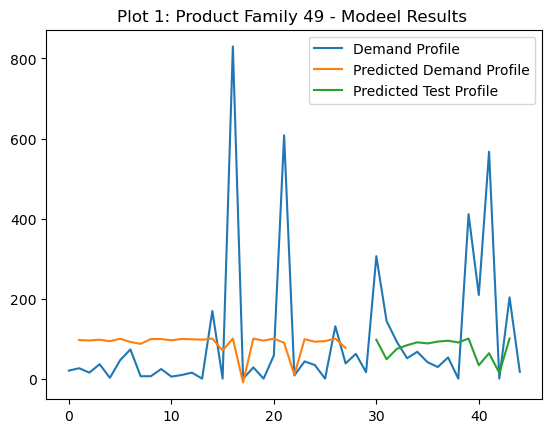

In [124]:
#Plotting Functions


# shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled_demand_profile)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag_periods:len(trainPredict)+lag_periods, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_demand_profile)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lag_periods*2)+1:len(scaled_demand_profile)-1, :] = testPredict
# plot baseline and predictions

scaler = MinMaxScaler()
demand = scaler.fit_transform(demand_profile)
plt.plot(scaler.inverse_transform(scaled_demand_profile), label = 'Demand Profile')
plt.plot(trainPredictPlot, label = 'Predicted Demand Profile')
plt.plot(testPredictPlot, label = 'Predicted Test Profile')
plt.title('Plot 1: Product Family 49 - Modeel Results ')
plt.legend(loc='upper right')
plt.show()

***Example Prediction / Forecasting Results***

Plot 4 above provides a sample view of the the orginal demand profile and complex model results for Product Family 49.  As can be seen in the chart, the resultanf forcast is less than desireable.  Results plots for all three demand classes were reviewed and for brevity sake a single sample is provided.  Plot 4 is indicitive of the results for both models and all three demand classes.  The results show that both models had a very difficult time learning and predicting demand patterns of a sporadic nature.

This is not surprising given the sparcity of the demand profiles.  Profiles of this nature are made up of many periods of zero demand.  The sporatic zero demand periods make it very difficult to model.  As can be seen in the chart, the end result being more of a moving average type of response.  The models could not pick up the sporatic patterns resulting in the modle's essentially establishing an averge type demand patten.  This can be seen in both the demand quantity and the period tracking.   It is safe to say, the LSTM models as defined above, exhibit poor performance against sporatice demand patterns.



### Model Comparison

***Root Mean Square Error Results***

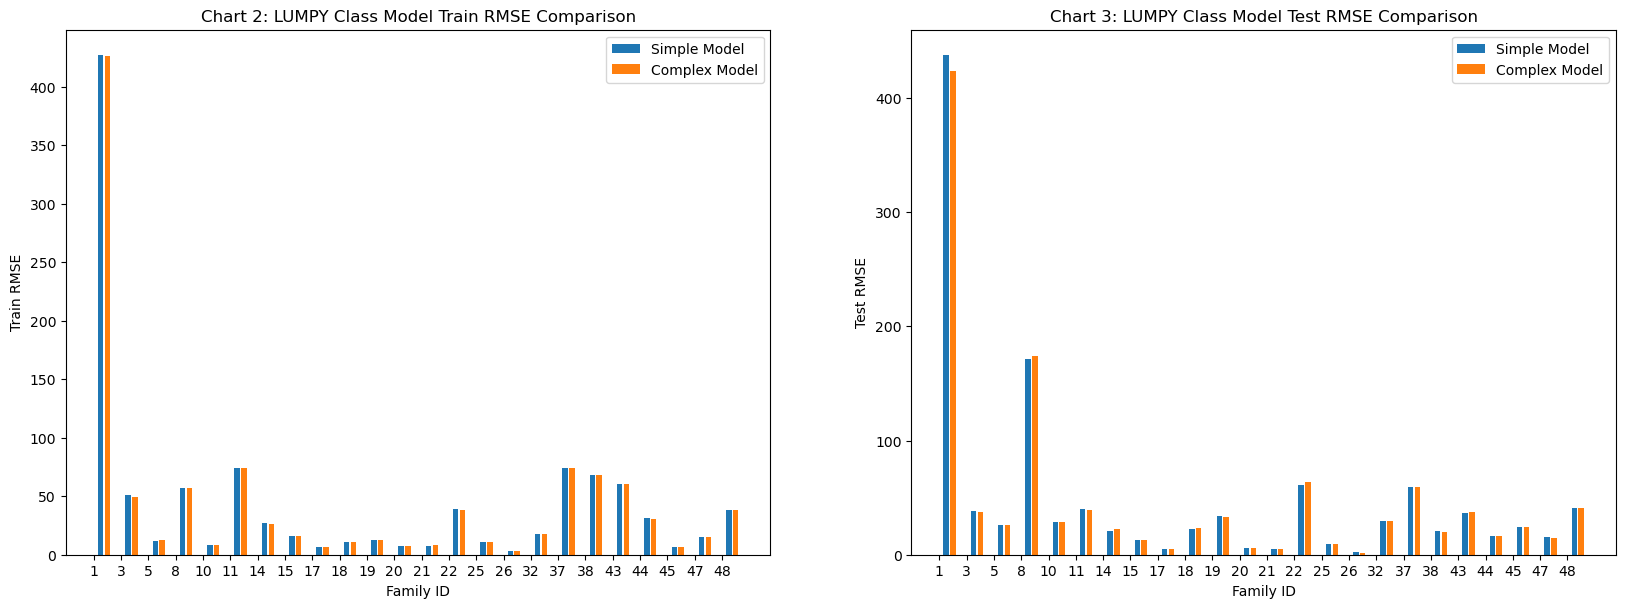

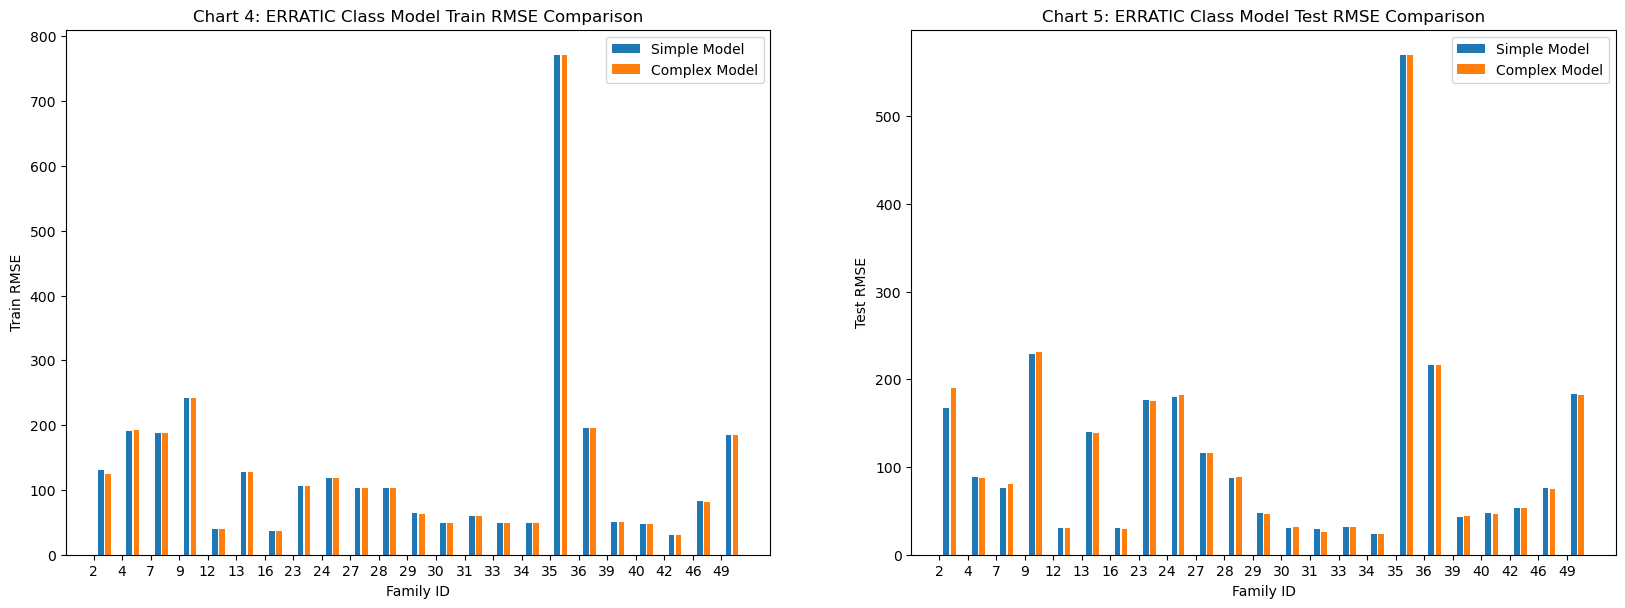

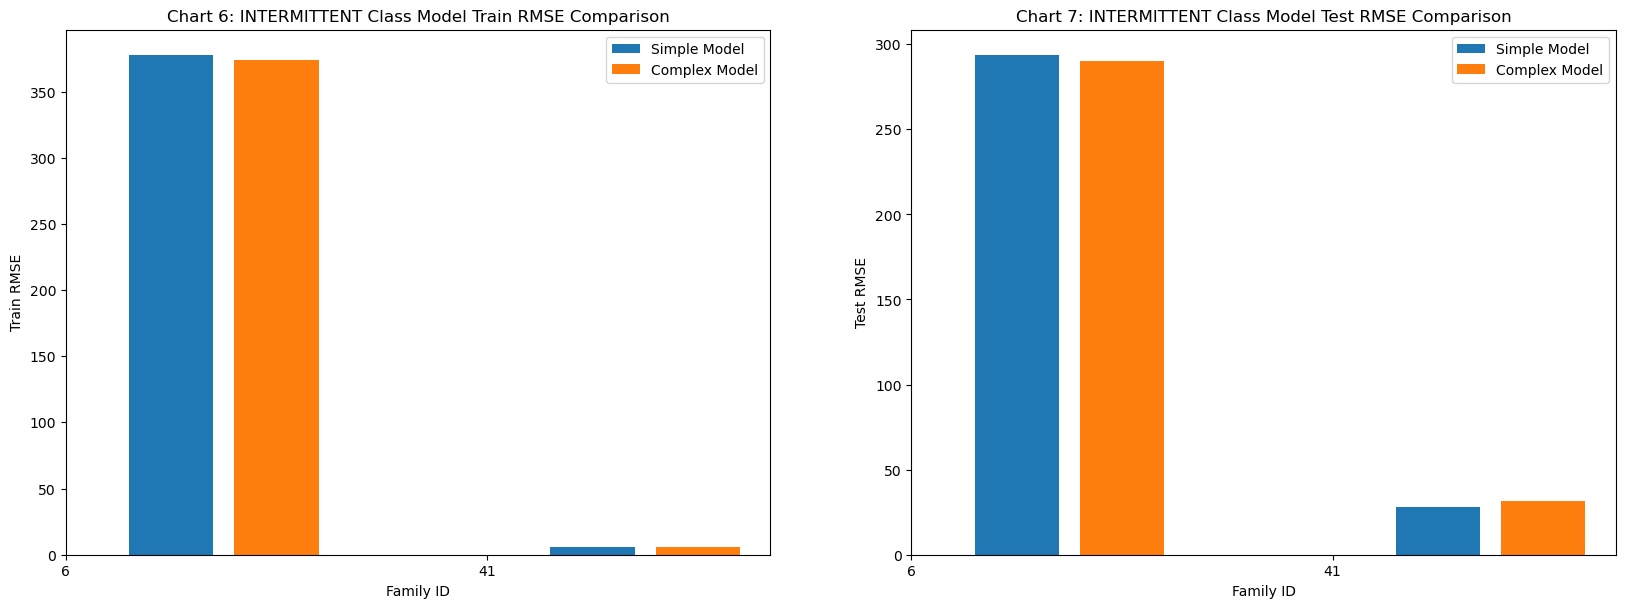

In [125]:
#Simple Model Pull in CSV data files

# reading CSV file
lumpy_simple_model = pd.read_csv("lumpy_rmse1.csv", header=None)
lumpy_complex_model = pd.read_csv("lumpy2_rmse.csv", header=None)
erratic_simple_model = pd.read_csv("erratic_rmse1.csv", header=None)
erratic_complex_model = pd.read_csv("erratic_rmse2.csv", header=None)
intermittent_simple_model = pd.read_csv("intermittent_rmse1.csv", header=None)
intermittent_complex_model = pd.read_csv("intermittent_rmse2.csv", header=None)

#calculate average test and train RMSE by model for each class
lumpy_simple_model_train_ave_rmse = lumpy_simple_model.iloc[:,1].mean()
lumpy_simple_model_test_ave_rmse = lumpy_simple_model.iloc[:,2].mean()
lumpy_complex_model_train_ave_rmse = lumpy_simple_model.iloc[:,1].mean()
lumpy_complex_model_test_ave_rmse = lumpy_simple_model.iloc[:,2].mean()

erratic_simple_model_train_ave_rmse = erratic_simple_model.iloc[:,1].mean()
erratic_simple_model_test_ave_rmse = erratic_simple_model.iloc[:,2].mean()
erratic_complex_model_train_ave_rmse = erratic_simple_model.iloc[:,1].mean()
erratic_complex_model_test_ave_rmse = erratic_simple_model.iloc[:,2].mean()

intermittent_simple_model_train_ave_rmse = intermittent_simple_model.iloc[:,1].mean()
intermittent_simple_model_test_ave_rmse = intermittent_simple_model.iloc[:,2].mean()
intermittent_complex_model_train_ave_rmse = intermittent_simple_model.iloc[:,1].mean()
intermittent_complex_model_test_ave_rmse = intermittent_simple_model.iloc[:,2].mean()


#Lumpy Class Plots
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
lumpy_axis = np.arange(len(lumpy_simple_model.iloc[:,0].tolist()))
plt.bar(lumpy_axis +0.25, lumpy_simple_model.iloc[:,1].tolist(), width=0.2, label = 'Simple Model')
plt.bar(lumpy_axis +0.25*2, lumpy_complex_model.iloc[:,1].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(lumpy_axis,lumpy_family)
plt.xlabel("Family ID")
plt.ylabel("Train RMSE")
plt.title('Chart 2: LUMPY Class Model Train RMSE Comparison')
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(lumpy_axis +0.25, lumpy_simple_model.iloc[:,2].tolist(), width=0.2, label = 'Simple Model')
plt.bar(lumpy_axis +0.25*2, lumpy_complex_model.iloc[:,2].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(lumpy_axis,lumpy_family)
plt.legend()
plt.xlabel("Family ID")
plt.ylabel("Test RMSE")
plt.title('Chart 3: LUMPY Class Model Test RMSE Comparison')
plt.show()

#Erratic Class Plots
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
erratic_axis = np.arange(len(erratic_simple_model.iloc[:,0].tolist()))
plt.bar(erratic_axis +0.25, erratic_simple_model.iloc[:,1].tolist(), width=0.2, label = 'Simple Model')
plt.bar(erratic_axis +0.25*2, erratic_complex_model.iloc[:,1].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(erratic_axis,erratic_family)
plt.xlabel("Family ID")
plt.ylabel("Train RMSE")
plt.title('Chart 4: ERRATIC Class Model Train RMSE Comparison')
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(erratic_axis +0.25, erratic_simple_model.iloc[:,2].tolist(), width=0.2, label = 'Simple Model')
plt.bar(erratic_axis +0.25*2, erratic_complex_model.iloc[:,2].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(erratic_axis,erratic_family)
plt.legend()
plt.xlabel("Family ID")
plt.ylabel("Test RMSE")
plt.title('Chart 5: ERRATIC Class Model Test RMSE Comparison')
plt.show()

#Imtermittent Class Plots
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
intermittent_axis = np.arange(len(intermittent_simple_model.iloc[:,0].tolist()))
plt.bar(intermittent_axis +0.25, intermittent_simple_model.iloc[:,1].tolist(), width=0.2, label = 'Simple Model')
plt.bar(intermittent_axis +0.25*2, intermittent_complex_model.iloc[:,1].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(intermittent_axis,intermittent_family)
plt.xlabel("Family ID")
plt.ylabel("Train RMSE")
plt.title('Chart 6: INTERMITTENT Class Model Train RMSE Comparison')
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(intermittent_axis +0.25, intermittent_simple_model.iloc[:,2].tolist(), width=0.2, label = 'Simple Model')
plt.bar(intermittent_axis +0.25*2, intermittent_complex_model.iloc[:,2].tolist(), width=0.2, label = 'Complex Model')
plt.xticks(intermittent_axis,intermittent_family)
plt.legend()
plt.xlabel("Family ID")
plt.ylabel("Test RMSE")
plt.title('Chart 7: INTERMITTENT Class Model Test RMSE Comparison')
plt.show()


In [113]:
#print average test and train RMSE by model for each class
print('Average RMSE (Lumpy, Simple, Train): ', round(lumpy_simple_model.iloc[:,1].mean(), 2))
print('Average RMSE (Lumpy, Simple, Test): ', round(lumpy_simple_model.iloc[:,2].mean(), 2))
print('Average RMSE (Lumpy, Complex, Train): ', round(lumpy_complex_model.iloc[:,1].mean(), 2))
print('Average RMSE (Lumpy, Complex, Test): ', round(lumpy_complex_model.iloc[:,2].mean(), 2))

print('Average RMSE (Erratic, Simple, Train): ', round(erratic_simple_model.iloc[:,1].mean(), 2))
print('Average RMSE (Erratic, Simple, Test): ', round(erratic_simple_model.iloc[:,2].mean(), 2))
print('Average RMSE (Erratic, Complex, Train): ', round(erratic_complex_model.iloc[:,1].mean(), 2))
print('Average RMSE (Erratic, Complex, Test): ', round(erratic_complex_model.iloc[:,2].mean(), 2))

print('Average RMSE (Intermittent, Simple, Train): ', round(intermittent_simple_model.iloc[:,1].mean(), 2))
print('Average RMSE (Intermittent, Simple, Test): ', round(intermittent_simple_model.iloc[:,2].mean(), 2))
print('Average RMSE (Intermittent, Complex, Train): ', round(intermittent_complex_model.iloc[:,1].mean(), 2))
print('Average RMSE (Intermittent, Complex, Test): ', round(intermittent_complex_model.iloc[:,2].mean(), 2))

Average RMSE (Lumpy, Simple, Train):  45.12
Average RMSE (Lumpy, Simple, Test):  48.55
Average RMSE (Lumpy, Complex, Train):  44.9
Average RMSE (Lumpy, Complex, Test):  48.2
Average RMSE (Erratic, Simple, Train):  131.29
Average RMSE (Erratic, Simple, Test):  116.14
Average RMSE (Erratic, Complex, Train):  130.83
Average RMSE (Erratic, Complex, Test):  117.4
Average RMSE (Intermittent, Simple, Train):  191.65
Average RMSE (Intermittent, Simple, Test):  161.03
Average RMSE (Intermittent, Complex, Train):  189.69
Average RMSE (Intermittent, Complex, Test):  160.9


### Results and Analysis

**Table 1: Model Complexity vs. Root Mean Square Error**

|Demand Class|Model|Train RMSE|Test RMSE|
|:-----------|:----|:--------:|:--------:|
|Lumpy|Simple|45.12|48.55|
|Lumpy|Complex|44.90|48.2|
|Erratic|Simple|131.29|116.14|
|Erratic|Complex|130.83|117.4|
|Intermittent|Simple|191.65|161.03|
|Intermittent|Complex|189.69|160.9|


***Table 2: Model Complexity vs. Root Mean Square Error - Change and Percent Change***

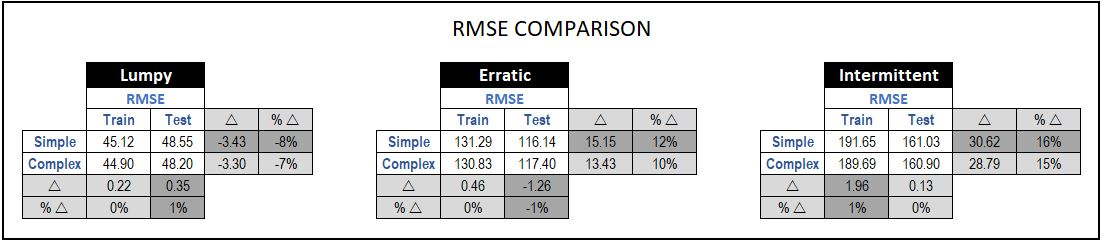

Plot 1 depicts a grphical representation of the training, testing and prediction results for Product Family 49.  Plots of multiple families from all three demand classes were reviewd and they all showed a similiar pattern.  The predicted values appear to be tracking a moving average of the actual demand quantity.  The average nature of the predictions against some of the larger spikes in the demand profiles are considered to be the large contibutors to the RMSE.

The averaging nature of the models combined with the larger spikes seem to be driving the poor perfromance of the models.  It was proposed that the addtional layers and sequencing of the complex model would help abosorb some of this variability.  Clearly it did not, as the average RMSE for both models tracked closely on a product family basis.

The results shown in Charts 2-6 reveal that the RMSE values both across families and demand pattern classes vary widely.  This is not necessarily unexpected as each family within a class could have wildly different CV2 and ADI values.  As can be seen in Images 3 and 4, the Intermittent, Lumpy and Erratic demand patterns contain CV2 and ADI bounds.  Addtionally the Intermittent pattern has no ADI upper bound, the Erratic pattern has no CV2 upper bound, and the Lumpy pattern has neither an ADI or CV2 upper bound.

Given the boundless nature of the classification structure, the demand profiles for the classes can surely vary dramtically within a class, as well as, across classes.  It is not unexpected to see wide ranges in RMSE depending on where and how the individual demand profile's variability exsists.  The difficulty then becomes how to make comparisons between classes.  For the comparison, a simple average will be used.  This will provide a global sense of how the models for the different classes compare to each other.  

From both the charts and tables it is evident that the family level training and test RSME results track each other quite well.  This is a positive sign for the model training. What is interesting is that the Lumpy class (no upper and lower bounds) had the lowest averge RSME.  While the classes with a single bound had the higher average RSME.  The Erratic and Intermittent patterns showed a 2.9X and 7.9X greater RMSE than the Lumpy pattern.  This is somewhat perplexing bounded nature of the classes.  The case of the intermittenet class is somewhat understandable given only two families reside in the intermittent class. A more detailed study is necessary to better understand this.

From Tables 1 and 2 there are a few patterns that result.  For all three classes, the complex models performed marginally better than the simple model when training.  This falls in lines with the initial hypothesis that a more complex model should perfrom better.  However, give the marginal difference, a maximu of 2% for the Intermittent class, it is hard to say that they one is statistically better than the other.  In short the complexity of the modles had no impact across the demand pattern classes.  The complexity of the model did not favor one class over another.

What is the rational for the poor performance of both models.  In retrospect, it is believed that scaling of the time series' may be driving the poor performance, as well as, contibuting to results appearing as moving averages.  Scaling the demand, with a considerable amount of zero periods results in a smoothing of the data, hence the average appearance.

A more appropriate scaling, or 'transformation' of the data to a more continous space might have been more appropriate.  Similiar to the way a fourier transform is used on spectral times series data.  The erratic spectoral patterns are moved into the time domain.  The time domain space contains a more well behaved pattern to be analyzed.  The model could then train and forecast on a well behaved series.  The resuls then transformed back possibly rsulting in much improved performance.

### Conclusion

**Performance**

From the discussion above, the overall performance of both models was poor.  The analysis showed that performance of the training and test sets provided similiar results.  However, the prediction results were far from desired.  Both models did a very poor job of prediction future demand.  The results showed marginal performance improvements in the complex model, which aligned with the initial hypothesis.  However, the minimal improvments hardly warrant the addtional resources required by the complex model.

The models also showed dramatically different in family RMSE results.  THis falls in line with expectations and CV@ and ADI can vary widely within a family.   

The models provided the least error on the lumpy patterns.  The error was ~3 times worse for the erratic patterns and ~4X worse on the intermittent patterns.  All in all, the current model and approach is deemed illadvised.  Improvments or an alternate approach is required with potential options provided below.


**Improvments**

As noted in the analysis section above, defining some type of trnasformation of the demand profiles in to a more wll behaved space could provide benfits.  The resulting of the training, testing and predictions in the well behaved profiles could then be transformed back into the sporatic space, possibly generating improved performance.


**Future Work**

Given the poor performace of the models based on the current dataset, one wonders if looking for a more simplistic output would provide some benefit.  The current ask from the models is to provide a prediction of quantites in a time series.  An  interesting approach would be to decrease the ask and just look for predictions of future periods of demand, reguardless of quantity.  The model would analyze a binary times series of demand periods, 1 for periods with demand, 0 for periods without.  The model could then be constucted to simply predict future periods with or without demand.

If the binary model provides acceptable results, that could then be used to build a hibrid model that could integrate a quantity element resulting in a combined model that performs as desired?







### References

Croston, J. (1972). Forecasting and stock control for intermittent demands. , 23, 289-304. Opl Res Q, 289-304.

Brownlee, Jason (2016).  Deep Learning for Time SeriesTime Series Prediction with LSTM Recurrent Neural Networks in Python with Keras., https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/.
